In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
!pip install linearmodels
from linearmodels import PanelOLS

# Import Datasets

In [218]:

data_a=pd.read_csv("C:\\Users\\Hsuan Yu\\Downloads\\main data 2001-2019.csv")


In [12]:
data_a.head()

,Year,Tm,Pos,Age,G,MP,PER,TS.,X3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,winning PCT,conference
0,2001,ATL,PG,23,5,34,-4.8,0.000,0.000,0.000,...,0,1,5,2,0,3,3,0,0.305,E
1,2001,ATL,SF,32,17,618,21.8,0.590,0.313,0.286,...,78,97,106,13,5,51,36,335,0.305,E
2,2001,ATL,SF,30,17,550,12.7,0.478,0.175,0.392,...,62,79,50,19,4,48,42,243,0.305,E
3,2001,ATL,PG,25,3,14,-10.6,0.000,0.200,0.000,...,3,3,3,0,0,2,0,0,0.305,E
4,2001,ATL,SG,32,6,78,3.8,0.356,0.087,0.087,...,1,3,10,7,0,9,12,17,0.305,E


In [219]:
data_a_pre=data_a[(data_a.Year==2019)]

In [220]:
data_a=data_a.drop(data_a[(data_a.Year==2019)].index)

In [221]:
data_a_pre

,Year,Tm,Player,Pos,Age,G,MP,PER,TS.,X3PAr,...,TRB,AST,STL,BLK,TOV,PF,PTS,winning PCT,league rank,conference
9390,2019,ATL,Deyonta Davis,C,22,9,118,15.6,0.682,0.045,...,36,5,3,5,3,12,36,0.354,26,E
9391,2019,ATL,Omari Spellman,PF,21,46,805,12.4,0.516,0.525,...,194,47,26,25,31,67,272,0.354,26,E
9392,2019,ATL,Vince Carter,SF,42,76,1330,11.8,0.565,0.675,...,194,87,44,27,48,141,562,0.354,26,E
9393,2019,ATL,B.J. Johnson,SF,23,6,43,14.0,0.622,0.375,...,8,0,2,0,2,3,21,0.354,26,E
9394,2019,ATL,DeAndre' Bembry,SG,24,82,1931,10.8,0.508,0.281,...,358,202,105,41,142,190,687,0.354,26,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10007,2019,WAS,Otto Porter,SF,25,41,1191,15.0,0.551,0.398,...,231,80,64,22,40,79,518,0.390,25,E
10008,2019,WAS,Jeff Green,PF,32,77,2097,13.6,0.608,0.466,...,309,137,43,39,101,160,946,0.390,25,E
10009,2019,WAS,Ron Baker,SG,25,4,45,-2.0,0.000,1.000,...,4,2,1,1,2,2,0,0.390,25,E
10010,2019,WAS,Austin Rivers,SG,26,29,683,6.8,0.490,0.546,...,71,58,18,10,36,72,210,0.390,25,E


In [222]:
data_a.columns

Index(['Year', 'Tm', 'Player', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS.', 'X3PAr',
       'FTr', 'ORB.', 'DRB.', 'TRB.', 'AST.', 'STL.', 'BLK.', 'TOV.', 'USG.',
       'OWS', 'DWS', 'WS', 'WS.48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG.', 'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT',
       'FTA', 'FT.', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'winning PCT', 'league rank', 'conference'],
      dtype='object')

In [223]:
data_a=data_a.drop(['league rank','Player'], axis=1)
data_a_pre=data_a_pre.drop(['league rank','Player'], axis=1)

In [228]:
# Change year_month column to datetime
#data_a['DATE'] = pd.to_datetime(data_a['year_month'], format="%Y-%m")

### Optional - Lagged Sales

In [236]:
#data_a["Sales_Lag"] = data_a['TOTAL_SALES_AMT']

# EDA

In [193]:
data_a.head()

,Year,Tm,Pos,Age,G,MP,PER,TS.,X3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,winning PCT,conference
0,2001,ATL,PG,23,5,34,-4.8,0.000,0.000,0.000,...,0,1,5,2,0,3,3,0,0.305,E
1,2001,ATL,SF,32,17,618,21.8,0.590,0.313,0.286,...,78,97,106,13,5,51,36,335,0.305,E
2,2001,ATL,SF,30,17,550,12.7,0.478,0.175,0.392,...,62,79,50,19,4,48,42,243,0.305,E
3,2001,ATL,PG,25,3,14,-10.6,0.000,0.200,0.000,...,3,3,3,0,0,2,0,0,0.305,E
4,2001,ATL,SG,32,6,78,3.8,0.356,0.087,0.087,...,1,3,10,7,0,9,12,17,0.305,E


In [224]:
# Change the DATE from object to Datetime
data_a['Year'] = pd.to_datetime(data_a['Year'], format="%Y")
data_a_pre['Year'] = pd.to_datetime(data_a_pre['Year'], format="%Y")

In [195]:
# Check null values 
data_a.isnull().sum()

Year           0
Tm             0
Pos            0
Age            0
G              0
MP             0
PER            0
TS.            0
X3PAr          0
FTr            0
ORB.           0
DRB.           0
TRB.           0
AST.           0
STL.           0
BLK.           0
TOV.           0
USG.           0
OWS            0
DWS            0
WS             0
WS.48          0
OBPM           0
DBPM           0
BPM            0
VORP           0
FG             0
FGA            0
FG.            0
X3P            0
X3PA           0
X3P.           0
X2P            0
X2PA           0
X2P.           0
eFG.           0
FT             0
FTA            0
FT.            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
winning PCT    0
conference     0
dtype: int64

In [196]:
data_a.shape

(9390, 50)

In [197]:
data_a.dtypes

Year           datetime64[ns]
Tm                     object
Pos                    object
Age                     int64
G                       int64
MP                      int64
PER                   float64
TS.                   float64
X3PAr                 float64
FTr                   float64
ORB.                  float64
DRB.                  float64
TRB.                  float64
AST.                  float64
STL.                  float64
BLK.                  float64
TOV.                  float64
USG.                  float64
OWS                   float64
DWS                   float64
WS                    float64
WS.48                 float64
OBPM                  float64
DBPM                  float64
BPM                   float64
VORP                  float64
FG                      int64
FGA                     int64
FG.                   float64
X3P                     int64
X3PA                    int64
X3P.                  float64
X2P                     int64
X2PA      

In [225]:
data_a=pd.get_dummies(data_a, columns=['Pos'])
data_a_pre=pd.get_dummies(data_a_pre, columns=['Pos'])

In [226]:
data_a=pd.get_dummies(data_a, columns=['conference'])
data_a_pre=pd.get_dummies(data_a_pre, columns=['conference'])

In [227]:
#remove extra dummies
data_a=data_a.drop(['conference_E','Pos_SG'], axis=1)
data_a_pre=data_a_pre.drop(['conference_E','Pos_SG'], axis=1)

In [201]:
data_a[['MP']].mean()

MP    1119.502023
dtype: float64

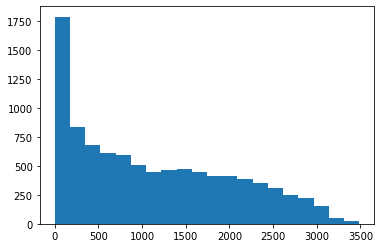

In [202]:
#check mp
import matplotlib.pyplot as plt

#x = [value1, value2, value3,....]
plt.hist(data_a['MP'], bins =20)
plt.show()

In [203]:
data_a.shape

(9390, 53)

In [229]:
#remove player that has low MP
data_a1 = data_a.drop(data_a[(data_a.MP < 400)].index)
data_a1_pre = data_a_pre.drop(data_a_pre[(data_a_pre.MP < 400)].index)
data_a1.shape

(6565, 53)

In [230]:
# Sort the datasets by team and date
df = data_a1
df_pre=data_a1_pre
df.sort_values(["Tm", "Year"],inplace=True)
df_pre.sort_values(["Tm", "Year"],inplace=True)
# Set date and team as two indexs for the panel ols
df = df.set_index(["Tm", "Year"])
df_pre = df_pre.set_index(["Tm", "Year"])
df

Age   G    MP   PER    TS.  X3PAr    FTr  ORB.  DRB.  TRB.  \
Tm  Year                                                                     
ATL 2001-01-01   32  17   618  21.8  0.590  0.313  0.286   3.4  14.2   8.7   
    2001-01-01   30  17   550  12.7  0.478  0.175  0.392   3.4  12.6   8.0   
    2001-01-01   25  47  1364  12.9  0.424  0.028  0.169   1.8  11.4   6.6   
    2001-01-01   20  78  1313   8.4  0.463  0.326  0.223   4.7  10.4   7.6   
    2001-01-01   28  73  1810  14.0  0.487  0.001  0.404  11.0  14.0  12.5   
...             ...  ..   ...   ...    ...    ...    ...   ...   ...   ...   
WAS 2018-01-01   26  73  1643  15.4  0.615  0.263  0.250   5.0  11.1   8.0   
    2018-01-01   33  82  2075  14.7  0.546  0.000  0.291   9.9  24.0  17.0   
    2018-01-01   24  82  2977  18.4  0.564  0.357  0.249   2.3  11.5   6.9   
    2018-01-01   28  73  1968  13.2  0.566  0.301  0.186   4.3  19.2  11.8   
    2018-01-01   27  59   838  11.3  0.475  0.326  0.174   2.4  13.1   7.8   

                ...  BLK  TOV   PF   PTS  winning PCT  Pos_C  Pos_PF  Pos_PG  \
Tm  Year        ...                                                            
ATL 2001-01-01  ...    5   51   36   335        0.305      0       0       0   
    2001-01-01  ...    4   48   42   243        0.305      0       0       0   
    2001-01-01  ...    3   84  138   324        0.305      0       0       1   
    2001-01-01  ...   30   93  134   397        0.305      0       0       0   
    2001-01-01  ...   29  126  164   769        0.305      0       1       0   
...             ...  ...  ...  ...   ...          ...    ...     ...     ...   
WAS 2018-01-01  ...   15   83  131   524        0.511      0       0       0   
    2018-01-01  ...   61   99  175   690        0.511      1       0       0   
    2018-01-01  ...   36  214  160  1857        0.511      0       0       0   
    2018-01-01  ...   38  127  216   841        0.511      0       1       0   
    2018-01-01  ...    7   57   97   176        0.511      0       0       1   

                Pos_SF  conference_W  
Tm  Year                              
ATL 2001-01-01       1             0  
    2001-01-01       1             0  
    2001-01-01       0             0  
    2001-01-01       1             0  
    2001-01-01       0             0  
...                ...           ...  
WAS 2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  

[6565 rows x 51 columns]

In [231]:
df.columns.values

array(['Age', 'G', 'MP', 'PER', 'TS.', 'X3PAr', 'FTr', 'ORB.', 'DRB.',
       'TRB.', 'AST.', 'STL.', 'BLK.', 'TOV.', 'USG.', 'OWS', 'DWS', 'WS',
       'WS.48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG.', 'X3P',
       'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FTA', 'FT.',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'winning PCT', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'conference_W'], dtype=object)

In [232]:
df = df.fillna(0)
df_pre = df_pre.fillna(0)

# Feature Engineering

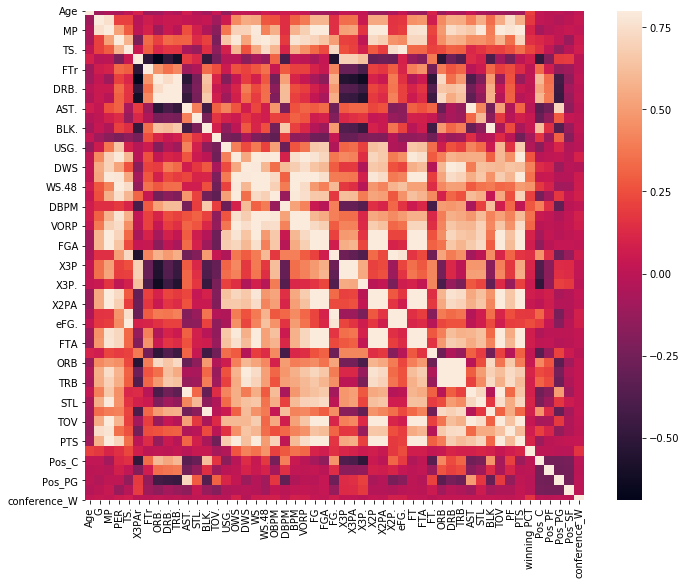

In [233]:
#correlation matrix for words
corrmat = df[['Age', 'G', 'MP', 'PER', 'TS.', 'X3PAr', 'FTr', 'ORB.', 'DRB.',
       'TRB.', 'AST.', 'STL.', 'BLK.', 'TOV.', 'USG.', 'OWS', 'DWS', 'WS',
       'WS.48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG.', 'X3P',
       'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.', 'FT', 'FTA', 'FT.',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'winning PCT', 'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'conference_W']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [44]:
# log transformation
#df['XX_log']=np.log(df['XX'])


In [234]:
df.dtypes

Age               int64
G                 int64
MP                int64
PER             float64
TS.             float64
X3PAr           float64
FTr             float64
ORB.            float64
DRB.            float64
TRB.            float64
AST.            float64
STL.            float64
BLK.            float64
TOV.            float64
USG.            float64
OWS             float64
DWS             float64
WS              float64
WS.48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
FG                int64
FGA               int64
FG.             float64
X3P               int64
X3PA              int64
X3P.            float64
X2P               int64
X2PA              int64
X2P.            float64
eFG.            float64
FT                int64
FTA               int64
FT.             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK             

# Panel 

In [235]:
df_pn = df
df_pn_pre = df_pre
df_pn.head()

Age   G    MP   PER    TS.  X3PAr    FTr  ORB.  DRB.  TRB.  \
Tm  Year                                                                     
ATL 2001-01-01   32  17   618  21.8  0.590  0.313  0.286   3.4  14.2   8.7   
    2001-01-01   30  17   550  12.7  0.478  0.175  0.392   3.4  12.6   8.0   
    2001-01-01   25  47  1364  12.9  0.424  0.028  0.169   1.8  11.4   6.6   
    2001-01-01   20  78  1313   8.4  0.463  0.326  0.223   4.7  10.4   7.6   
    2001-01-01   28  73  1810  14.0  0.487  0.001  0.404  11.0  14.0  12.5   

                ...  BLK  TOV   PF  PTS  winning PCT  Pos_C  Pos_PF  Pos_PG  \
Tm  Year        ...                                                           
ATL 2001-01-01  ...    5   51   36  335        0.305      0       0       0   
    2001-01-01  ...    4   48   42  243        0.305      0       0       0   
    2001-01-01  ...    3   84  138  324        0.305      0       0       1   
    2001-01-01  ...   30   93  134  397        0.305      0       0       0   
    2001-01-01  ...   29  126  164  769        0.305      0       1       0   

                Pos_SF  conference_W  
Tm  Year                              
ATL 2001-01-01       1             0  
    2001-01-01       1             0  
    2001-01-01       0             0  
    2001-01-01       1             0  
    2001-01-01       0             0  

[5 rows x 51 columns]

In [211]:
pd.set_option('display.max_rows', 100)
df

Age   G    MP   PER    TS.  X3PAr    FTr  ORB.  DRB.  TRB.  \
Tm  Year                                                                     
ATL 2001-01-01   32  17   618  21.8  0.590  0.313  0.286   3.4  14.2   8.7   
    2001-01-01   30  17   550  12.7  0.478  0.175  0.392   3.4  12.6   8.0   
    2001-01-01   25  47  1364  12.9  0.424  0.028  0.169   1.8  11.4   6.6   
    2001-01-01   20  78  1313   8.4  0.463  0.326  0.223   4.7  10.4   7.6   
    2001-01-01   28  73  1810  14.0  0.487  0.001  0.404  11.0  14.0  12.5   
...             ...  ..   ...   ...    ...    ...    ...   ...   ...   ...   
WAS 2018-01-01   26  73  1643  15.4  0.615  0.263  0.250   5.0  11.1   8.0   
    2018-01-01   33  82  2075  14.7  0.546  0.000  0.291   9.9  24.0  17.0   
    2018-01-01   24  82  2977  18.4  0.564  0.357  0.249   2.3  11.5   6.9   
    2018-01-01   28  73  1968  13.2  0.566  0.301  0.186   4.3  19.2  11.8   
    2018-01-01   27  59   838  11.3  0.475  0.326  0.174   2.4  13.1   7.8   

                ...  BLK  TOV   PF   PTS  winning PCT  Pos_C  Pos_PF  Pos_PG  \
Tm  Year        ...                                                            
ATL 2001-01-01  ...    5   51   36   335        0.305      0       0       0   
    2001-01-01  ...    4   48   42   243        0.305      0       0       0   
    2001-01-01  ...    3   84  138   324        0.305      0       0       1   
    2001-01-01  ...   30   93  134   397        0.305      0       0       0   
    2001-01-01  ...   29  126  164   769        0.305      0       1       0   
...             ...  ...  ...  ...   ...          ...    ...     ...     ...   
WAS 2018-01-01  ...   15   83  131   524        0.511      0       0       0   
    2018-01-01  ...   61   99  175   690        0.511      1       0       0   
    2018-01-01  ...   36  214  160  1857        0.511      0       0       0   
    2018-01-01  ...   38  127  216   841        0.511      0       1       0   
    2018-01-01  ...    7   57   97   176        0.511      0       0       1   

                Pos_SF  conference_W  
Tm  Year                              
ATL 2001-01-01       1             0  
    2001-01-01       1             0  
    2001-01-01       0             0  
    2001-01-01       1             0  
    2001-01-01       0             0  
...                ...           ...  
WAS 2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  
    2018-01-01       0             0  

[6565 rows x 51 columns]

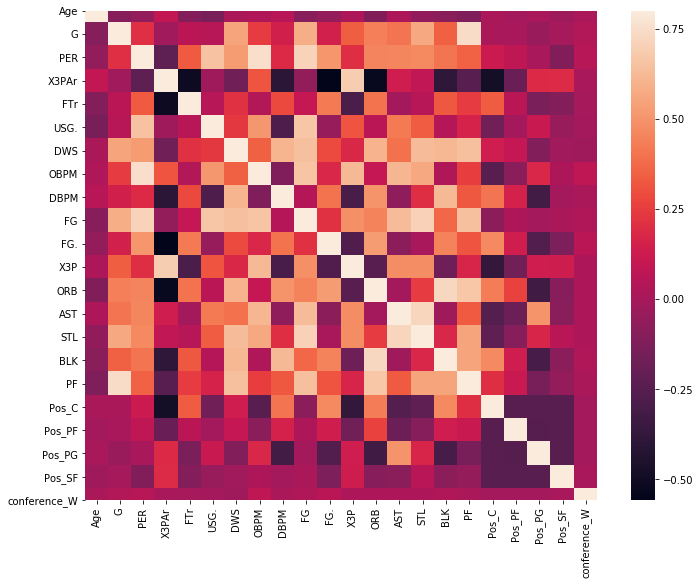

In [236]:
#correlation matrix for words
corrmat = df[['Age', 'G','PER','X3PAr', 'FTr', 'USG.','DWS',
       'OBPM', 'DBPM','FG', 'FG.', 'X3P',
       'ORB', 'AST', 'STL', 'BLK','PF',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'conference_W']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [214]:
# Set X and Y varibales
X=df_pn[['Age', 'G','PER','X3PAr', 'FTr', 'USG.','DWS',
       'OBPM', 'DBPM','FG', 'FG.', 'X3P',
       'ORB', 'AST', 'STL', 'BLK','PF',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'conference_W']]
X_pre=df_pn_pre[['Age', 'G','PER','X3PAr', 'FTr', 'USG.','DWS',
       'OBPM', 'DBPM','FG', 'FG.', 'X3P',
       'ORB', 'AST', 'STL', 'BLK','PF',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF',
       'conference_W']]

y=df_pn['winning PCT']

y1=np.log(y)

In [215]:
import statsmodels.api as sm
X=sm.add_constant(X)

In [216]:
# Fit the PanelOLS model
mod = PanelOLS(y,X, entity_effects=True,time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res

Dep. Variable:,winning PCT,R-squared:,0.4010
Estimator:,PanelOLS,R-squared (Between):,0.1259
No. Observations:,6565,R-squared (Within):,0.3971
Date:,"Wed, Apr 01 2020",R-squared (Overall):,0.3218
Time:,21:53:12,Log-likelihood,5692.1
Cov. Estimator:,Clustered,,
,,F-statistic:,197.42
Entities:,37,P-value,0.0000
Avg Obs:,177.43,Distribution:,"F(22,6489)"
Min Obs:,13.000,,
Max Obs:,232.00,F-statistic (robust):,57.181


In [ ]:
# create new formula based on the model summary and correlations between variables
formula_reg='y ~ 1 + Unemployment+FilledMarkdown1+FilledMarkdown2+FilledMarkdown3+FilledMarkdown4+FilledMarkdown5+FilledMarkdown1*IsHoliday +FilledMarkdown2*IsHoliday+FilledMarkdown3*IsHoliday+FilledMarkdown4*IsHoliday+FilledMarkdown5*IsHoliday+FilledMarkdown1*IsHoliday_pre +FilledMarkdown2*IsHoliday_pre+FilledMarkdown3*IsHoliday_pre+FilledMarkdown4*IsHoliday_pre+FilledMarkdown5*IsHoliday_pre+FilledMarkdown1*IsHoliday_next +FilledMarkdown2*IsHoliday_next+FilledMarkdown3*IsHoliday_next+FilledMarkdown4*IsHoliday_next+FilledMarkdown5*IsHoliday_next+C(month)+ EntityEffects'